# EDA
We created 5 plots to provide insight into the data and potential correlations between attributes

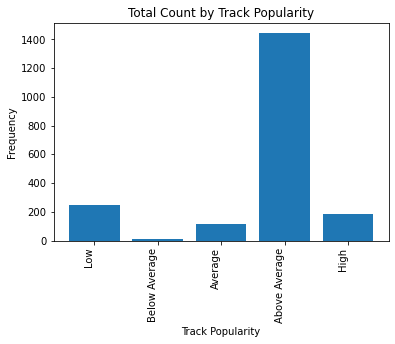

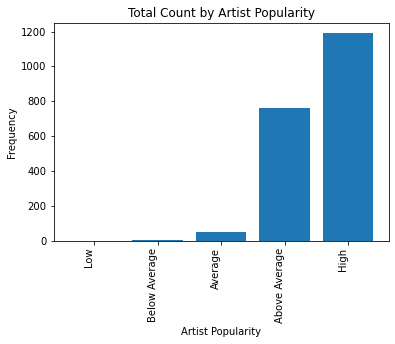

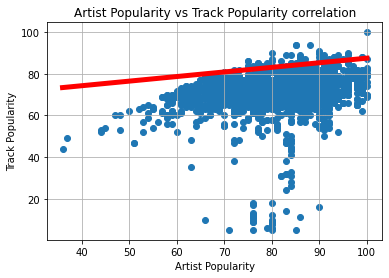

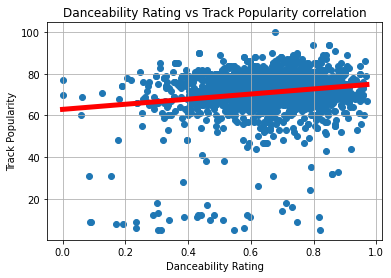

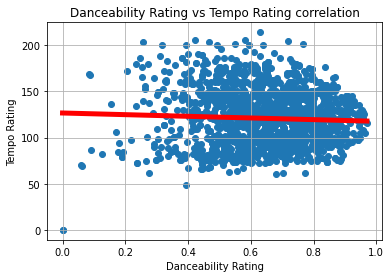

In [29]:
import importlib
import utils 
importlib.reload(utils)
import plot_utils
importlib.reload(plot_utils)
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

music_table = MyPyTable()
music_fname = os.path.join("input_data", "music-data.csv")
music_table.load_from_file(music_fname)

track_popularity_values, track_popularity_counts = utils.get_frequencies(music_table.data, music_table.column_names, "track_popularity")
track_popularity_values = list(track_popularity_values)
track_popularity_counts = list(track_popularity_counts)

discretized_counts = [0] * 5
for i, value in enumerate(track_popularity_values):
    if value <= 20:
        discretized_counts[0] += track_popularity_counts[i]
    elif value > 20 and value <= 40:
        discretized_counts[1] += track_popularity_counts[i]
    elif value > 40 and value <= 60:
        discretized_counts[2] += track_popularity_counts[i]
    elif value > 60 and value <= 80:
        discretized_counts[3] += track_popularity_counts[i]
    elif value > 80:
        discretized_counts[4] += track_popularity_counts[i]

track_popularity_values = ["Low", "Below Average", "Average", "Above Average", "High"]
plot_utils.bar_chart(track_popularity_values, discretized_counts, "Track Popularity")

artist_popularity_values, artist_popularity_counts = utils.get_frequencies(music_table.data, music_table.column_names, "artist_popularity")
artist_popularity_values = list(artist_popularity_values)
artist_popularity_counts = list(artist_popularity_counts)
artist_discretized_counts = [0] * 5

for i, value in enumerate(artist_popularity_values):
    if value <= 20:
        artist_discretized_counts[0] += artist_popularity_counts[i]
    elif value > 20 and value <= 40:
        artist_discretized_counts[1] += artist_popularity_counts[i]
    elif value > 40 and value <= 60:
        artist_discretized_counts[2] += artist_popularity_counts[i]
    elif value > 60 and value <= 80:
        artist_discretized_counts[3] += artist_popularity_counts[i]
    elif value > 80:
        artist_discretized_counts[4] += artist_popularity_counts[i]
artist_popularity_values = ["Low", "Below Average", "Average", "Above Average", "High"]
plot_utils.bar_chart(artist_popularity_values, artist_discretized_counts, "Artist Popularity")

all_artist_pop_values = utils.get_column(music_table.data, music_table.column_names, "artist_popularity")
all_track_pop_values = utils.get_column(music_table.data, music_table.column_names, "track_popularity")
danceability_values = utils.get_column(music_table.data, music_table.column_names, "danceability")
tempo_values = utils.get_column(music_table.data, music_table.column_names, "tempo")

new_artist_pop_values = []
new_track_pop_values = []
new_danceability_values = []
new_tempo_values = []
for i in range(len(all_artist_pop_values)):
    if all_track_pop_values[i] >= 5:
        new_artist_pop_values.append(all_artist_pop_values[i])
        new_track_pop_values.append(all_track_pop_values[i])
        new_danceability_values.append(danceability_values[i])
        new_tempo_values.append(tempo_values[i])


music_data = music_table.data.copy()
del_list = [0, 0, 2]
for j in music_data:
    for i in del_list:
        del j[i]
        
myutils.combine_genre(music_data)
genres = myutils.get_column_by_index(music_data, 3)

m, b = utils.compute_slope_intercept(new_track_pop_values, new_artist_pop_values)
plot_utils.linear_regression("Artist Popularity", "Track Popularity", new_artist_pop_values, new_track_pop_values, m, b)

m, b = utils.compute_slope_intercept(new_danceability_values, new_track_pop_values)
plot_utils.linear_regression("Danceability Rating", "Track Popularity", new_danceability_values, new_track_pop_values, m, b)

m, b = utils.compute_slope_intercept(new_danceability_values, new_tempo_values)
plot_utils.linear_regression("Danceability Rating", "Tempo Rating", new_danceability_values, new_tempo_values, m, b)
